In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Analysis

In [2]:
# Loading the dataframe
df = pd.read_csv('/content/insurance.csv')

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [10]:
# Gathering statistical values of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features -> sex, smoker, region

In [12]:
# Checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Figure size 700x700 with 0 Axes>

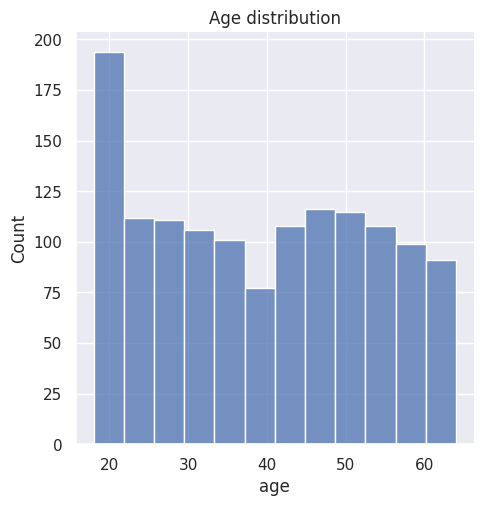

In [16]:
# Distribution of 'age' column
sns.set()
plt.figure(figsize = (7,7))
sns.displot(df['age'])
plt.title("Age distribution")
plt.show()

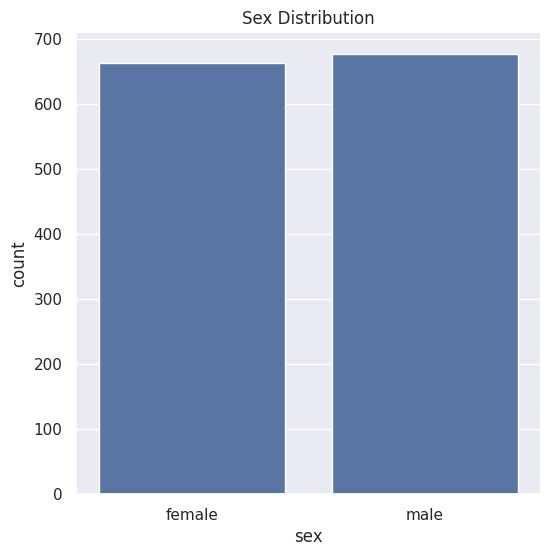

In [17]:
# Checking for 'sex' column
plt.figure(figsize = (6,6))
sns.countplot(x = df['sex'], data = df)
plt.title("Sex Distribution")
plt.show()

In [18]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 700x700 with 0 Axes>

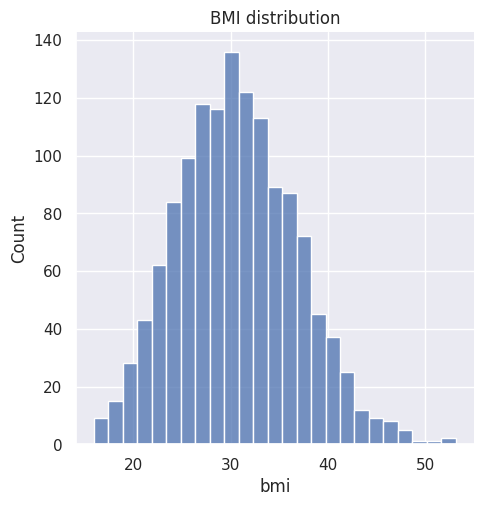

In [19]:
# 'BMI' column analysis
plt.figure(figsize = (7,7))
sns.displot(df['bmi'])
plt.title("BMI distribution")
plt.show()

BMI Normal Range -> 18.5 to 24.9

If values are below this range, person is Underweight
If values are above this range, person is Overweight

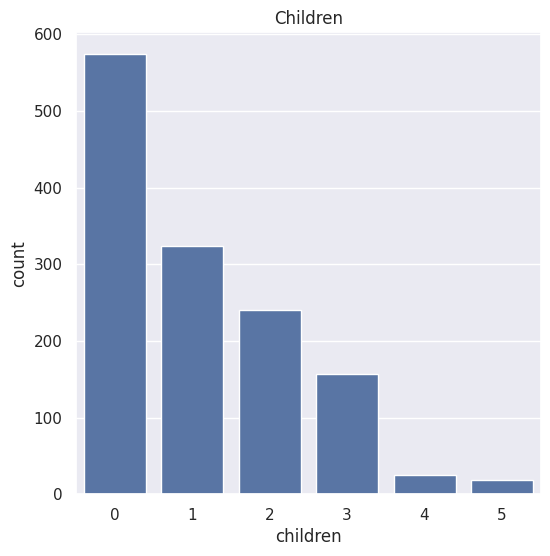

In [20]:
# Checking for 'sex' column
plt.figure(figsize = (6,6))
sns.countplot(x = df['children'], data = df)
plt.title("Children")
plt.show()

In [21]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

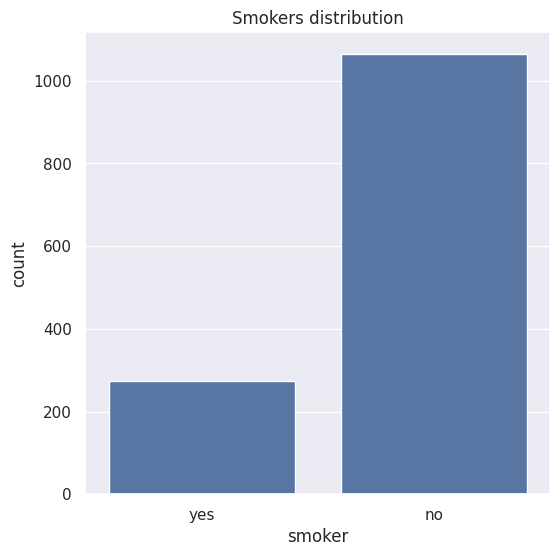

In [22]:
# Checking for 'smoker' column
plt.figure(figsize = (6,6))
sns.countplot(x = df['smoker'], data = df)
plt.title("Smokers distribution")
plt.show()

In [23]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

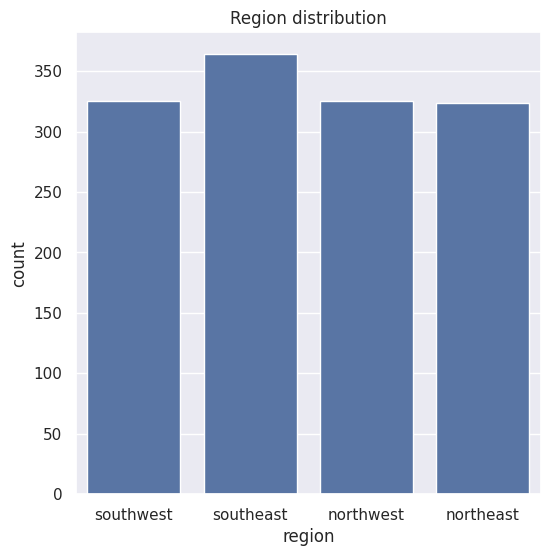

In [24]:
# Checking for 'region' column
plt.figure(figsize = (6,6))
sns.countplot(x = df['region'], data = df)
plt.title("Region distribution")
plt.show()

In [25]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 700x700 with 0 Axes>

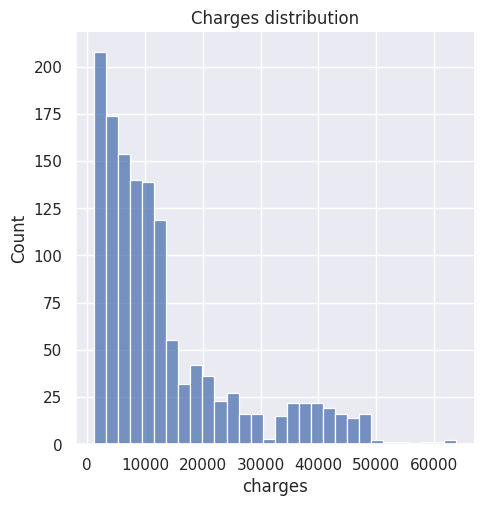

In [26]:
# 'charges' column analysis
plt.figure(figsize = (7,7))
sns.displot(df['charges'])
plt.title("Charges distribution")
plt.show()

Data Preprocessing

Encoding the categorical columns

In [27]:
# Encoding 'sex' column
df.replace({'sex':{'male': 0, 'female': 1}}, inplace = True)

# Encoding 'smoker' column
df.replace({'smoker':{'yes' : 0, 'no' : 1}}, inplace = True)

# Encoding 'region' column
df.replace({'region' : {'southeast' : 0, 'southwest' : 1, 'northeast' : 2, 'northwest' : 3}}, inplace = True)

In [28]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting the features and Targets

In [29]:
x = df.drop(columns = ['charges'], axis = 1)
y = df['charges']

In [30]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [31]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [32]:
print(x.shape, y.shape)

(1338, 6) (1338,)


Splitting the data into training and testing data

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [35]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [36]:
print(y.shape, y_train.shape, y_test.shape)

(1338,) (1070,) (268,)


Model Training

In [37]:
model = LinearRegression()

In [39]:
# Training the model
model.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [40]:
# Using 'R-square' metric
# Prediction on training data
train_pred = model.predict(x_train)
r2_train = metrics.r2_score(y_train, train_pred)
print("Accuracy on training data : ", r2_train)

Accuracy on training data :  0.751505643411174


In [41]:
# Using 'R-square' metric
# Prediction on training data
test_pred = model.predict(x_test)
r2_train = metrics.r2_score(y_test, test_pred)
print("Accuracy on test data : ", r2_train)

Accuracy on test data :  0.7447273869684076


Building the predictive system

In [44]:
input_data = (27,0,42.13,0,0,0)

# Convert to numpy array
ip_as_np = np.asarray(input_data)

# Reshape the Numpy array
ip_reshape = ip_as_np.reshape(1,-1)

prediction = model.predict(ip_reshape)
# print(prediction)

print("The insurance cost is (USD)", prediction[0])

[32075.73866962]
The insurance cost is (USD) 32075.738669618917


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Thank you**